In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dados = pd.read_csv("/content/customer_segmentation_10k.csv")
display(dados)


,customer_id,qtt_order,total_spent,last_order
0,0,370,189719.04,2022-10-30 07:00:00
1,1,48,159092.71,2022-06-30 12:00:00
2,2,4,28239.30,2022-08-21 01:00:00
3,3,157,378630.99,2022-06-30 04:00:00
4,4,16,84763.20,2022-03-18 20:00:00
...,...,...,...,...
9995,9995,30,272219.92,2022-05-03 05:00:00
9996,9996,5,4997.42,2022-06-05 05:00:00
9997,9997,324,61504.20,2022-01-26 21:00:00
9998,9998,142,238317.94,2022-07-29 17:00:00


In [ ]:
dados['last_order'] = pd.to_datetime(dados['last_order'])

# Calculo da distância de tempo entre a data atual e a data no conjunto de dados
data_atual = pd.to_datetime('2023-01-19')
dados['recencia'] = (data_atual - dados['last_order']).dt.days


print(dados[['last_order', 'recencia']])
display(dados)

              last_order  recencia
0    2022-10-30 07:00:00        80
1    2022-06-30 12:00:00       202
2    2022-08-21 01:00:00       150
3    2022-06-30 04:00:00       202
4    2022-03-18 20:00:00       306
...                  ...       ...
9995 2022-05-03 05:00:00       260
9996 2022-06-05 05:00:00       227
9997 2022-01-26 21:00:00       357
9998 2022-07-29 17:00:00       173
9999 2022-05-21 10:00:00       242

[10000 rows x 2 columns]


,customer_id,qtt_order,total_spent,last_order,recencia
0,0,370,189719.04,2022-10-30 07:00:00,80
1,1,48,159092.71,2022-06-30 12:00:00,202
2,2,4,28239.30,2022-08-21 01:00:00,150
3,3,157,378630.99,2022-06-30 04:00:00,202
4,4,16,84763.20,2022-03-18 20:00:00,306
...,...,...,...,...,...
9995,9995,30,272219.92,2022-05-03 05:00:00,260
9996,9996,5,4997.42,2022-06-05 05:00:00,227
9997,9997,324,61504.20,2022-01-26 21:00:00,357
9998,9998,142,238317.94,2022-07-29 17:00:00,173


In [ ]:
df_recencia = dados[["recencia"]]

def calcular_cotovelo(data):
    # Remodela o array de entrada para um array 2D
    data_reshaped = np.reshape(data.values, (-1, 1))

    cotovelo = []
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X=data_reshaped)
        data['Clusters'] = kmeans.labels_
        cotovelo.append(kmeans.inertia_)

    return cotovelo

soma_quadrados = calcular_cotovelo(df_recencia)



<ipython-input-32-abf0b3b4cc05>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Clusters'] = kmeans.labels_
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-32-abf0b3b4cc05>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Clusters'] = kmeans.labels_


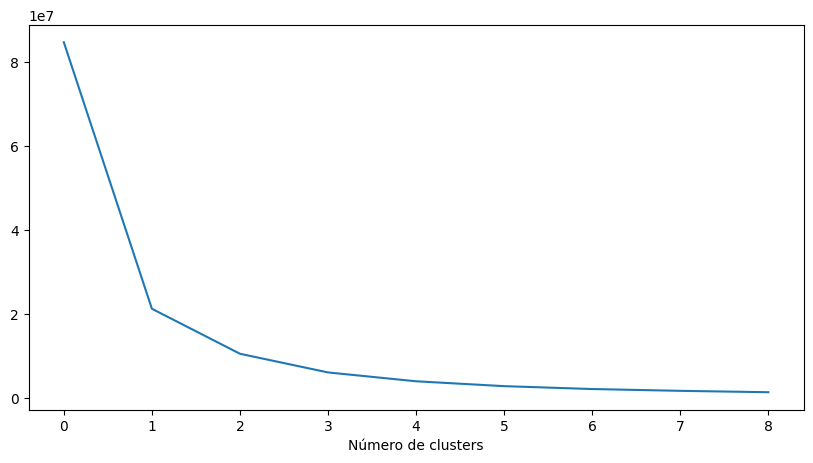

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(soma_quadrados)
plt.xlabel('Número de clusters')
plt.show()

Através do cálculo da regra do cotovelo adotarei o número de clusters como 4

### **CRIAÇÃO CLUSTERS DA RECÊNCIA**

In [ ]:
kmeans=KMeans(n_clusters=4)
dados['RecenciaCluster'] = kmeans.fit_predict(df_recencia)
dados.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,customer_id,qtt_order,total_spent,last_order,recencia,RecenciaCluster
0,0,370,189719.04,2022-10-30 07:00:00,80,2
1,1,48,159092.71,2022-06-30 12:00:00,202,1
2,2,4,28239.30,2022-08-21 01:00:00,150,1
3,3,157,378630.99,2022-06-30 04:00:00,202,1
4,4,16,84763.20,2022-03-18 20:00:00,306,3


In [ ]:
mapeamento_personalizadoR =dados.groupby('RecenciaCluster')['recencia'].min().sort_values(ascending=False).index
mapeamento_personalizadoR = {cluster: i for i, cluster in enumerate(mapeamento_personalizadoR)}

# Mapear os rótulos conforme o mapeamento personalizado
dados['RecenciaCluster'] = dados['RecenciaCluster'].map(mapeamento_personalizadoR)


In [ ]:
dados.groupby("RecenciaCluster")["recencia"].describe()

,count,mean,std,min,25%,50%,75%,max
RecenciaCluster,,,,,,,,
0,2449.0,339.864434,23.762398,303.0,319.0,339.0,358.0,418.0
1,2814.0,264.477967,23.335405,222.0,244.0,266.0,285.0,302.0
2,2468.0,178.777147,23.725592,139.0,158.0,178.0,199.0,221.0
3,2269.0,97.764213,27.560250,11.0,79.0,101.0,121.0,138.0


### **CRIAÇÃO CLUSTERS DA FREQUÊNCIA**

In [ ]:
kmeans = KMeans(n_clusters=4)
df_frequencia = dados[["qtt_order"]]
dados['FrequenciaCluster'] = kmeans.fit_predict(df_frequencia)
dados.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,customer_id,qtt_order,total_spent,last_order,recencia,RecenciaCluster,FrequenciaCluster
0,0,370,189719.04,2022-10-30 07:00:00,80,3,3
1,1,48,159092.71,2022-06-30 12:00:00,202,2,1
2,2,4,28239.30,2022-08-21 01:00:00,150,2,1
3,3,157,378630.99,2022-06-30 04:00:00,202,2,0
4,4,16,84763.20,2022-03-18 20:00:00,306,0,1


In [ ]:
mapeamento_personalizadoF = dados.groupby('FrequenciaCluster')['qtt_order'].max().sort_values().index
mapeamento_personalizadoF = {cluster: i for i, cluster in enumerate(mapeamento_personalizadoF)}


# Mapear os rótulos conforme o mapeamento personalizado
dados['FrequenciaCluster'] = dados['FrequenciaCluster'].map(mapeamento_personalizadoF)


In [ ]:
dados.groupby("FrequenciaCluster")["qtt_order"].describe()

,count,mean,std,min,25%,50%,75%,max
FrequenciaCluster,,,,,,,,
0,6613.0,36.240738,23.152486,0.0,16.0,33.0,54.0,87.0
1,2212.0,138.879747,39.815995,88.0,104.0,129.0,169.0,233.0
2,892.0,328.281390,71.085431,234.0,268.0,310.0,383.0,496.0
3,283.0,664.590106,138.784215,497.0,553.5,624.0,750.0,1274.0


### **CRIAÇÃO CLUSTERS MONETÁRIOS**

In [ ]:
kmeans = KMeans(n_clusters=4)
df_receita = dados[["total_spent"]]
dados['ReceitaCluster'] = kmeans.fit_predict(df_receita)
dados.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,customer_id,qtt_order,total_spent,last_order,recencia,RecenciaCluster,FrequenciaCluster,ReceitaCluster
0,0,370,189719.04,2022-10-30 07:00:00,80,3,2,0
1,1,48,159092.71,2022-06-30 12:00:00,202,2,0,1
2,2,4,28239.30,2022-08-21 01:00:00,150,2,0,1
3,3,157,378630.99,2022-06-30 04:00:00,202,2,1,0
4,4,16,84763.20,2022-03-18 20:00:00,306,0,0,1


In [ ]:
mapeamento_personalizadoM = dados.groupby('ReceitaCluster')['total_spent'].max().sort_values().index
mapeamento_personalizadoM= {cluster: i for i, cluster in enumerate(mapeamento_personalizadoM)}


# Mapear os rótulos conforme o mapeamento personalizado
dados['ReceitaCluster'] = dados['ReceitaCluster'].map(mapeamento_personalizadoM)


In [ ]:
dados.groupby("ReceitaCluster")["total_spent"].describe()

,count,mean,std,min,25%,50%,75%,max
ReceitaCluster,,,,,,,,
0,5990.0,8.049590e+04,49867.314241,833.02,37073.3925,76756.995,1.211497e+05,180693.17
1,2570.0,2.816037e+05,72956.395606,180934.41,217928.4825,266101.445,3.370794e+05,446919.15
2,1101.0,6.144284e+05,120771.521801,447888.43,507782.9900,592247.460,7.149575e+05,870428.28
3,339.0,1.129270e+06,217962.147489,871820.63,961951.5000,1073941.420,1.253511e+06,2181515.12


### Agora, criados os grupos de recência, frequência e receita, vamos criar uma pontação aos clientes, tornando-os segmentados.

In [ ]:
dados['Pontuacao'] = dados['RecenciaCluster'] +dados['FrequenciaCluster']+dados['ReceitaCluster']
display(dados)

,customer_id,qtt_order,total_spent,last_order,recencia,RecenciaCluster,FrequenciaCluster,ReceitaCluster,Pontuacao
0,0,370,189719.04,2022-10-30 07:00:00,80,3,2,1,6
1,1,48,159092.71,2022-06-30 12:00:00,202,2,0,0,2
2,2,4,28239.30,2022-08-21 01:00:00,150,2,0,0,2
3,3,157,378630.99,2022-06-30 04:00:00,202,2,1,1,4
4,4,16,84763.20,2022-03-18 20:00:00,306,0,0,0,0
...,...,...,...,...,...,...,...,...,...
9995,9995,30,272219.92,2022-05-03 05:00:00,260,1,0,1,2
9996,9996,5,4997.42,2022-06-05 05:00:00,227,1,0,0,1
9997,9997,324,61504.20,2022-01-26 21:00:00,357,0,2,0,2
9998,9998,142,238317.94,2022-07-29 17:00:00,173,2,1,1,4


In [ ]:
dados['Classificação'] = 'Inativo'
dados.loc[dados['Pontuacao']>=1,'Classificação'] = 'Business'
dados.loc[dados['Pontuacao']>=3,'Classificação'] = 'Master'
dados.loc[dados['Pontuacao']>=5,'Classificação'] = 'Premium'

display(dados)

,customer_id,qtt_order,total_spent,last_order,recencia,RecenciaCluster,FrequenciaCluster,ReceitaCluster,Pontuacao,Classificação
0,0,370,189719.04,2022-10-30 07:00:00,80,3,2,1,6,Premium
1,1,48,159092.71,2022-06-30 12:00:00,202,2,0,0,2,Business
2,2,4,28239.30,2022-08-21 01:00:00,150,2,0,0,2,Business
3,3,157,378630.99,2022-06-30 04:00:00,202,2,1,1,4,Master
4,4,16,84763.20,2022-03-18 20:00:00,306,0,0,0,0,Inativo
...,...,...,...,...,...,...,...,...,...,...
9995,9995,30,272219.92,2022-05-03 05:00:00,260,1,0,1,2,Business
9996,9996,5,4997.42,2022-06-05 05:00:00,227,1,0,0,1,Business
9997,9997,324,61504.20,2022-01-26 21:00:00,357,0,2,0,2,Business
9998,9998,142,238317.94,2022-07-29 17:00:00,173,2,1,1,4,Master


**Agora, vamos para visualização**

In [ ]:
def plot_segmento(x,y,data):
    sns.set(palette='muted',color_codes=True,style='whitegrid')
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=x,y=y,hue='Classificação',data=data,size='Classificação',sizes=(50,150),size_order=['Premium','Master','Business','Inativo'])
    plt.show()

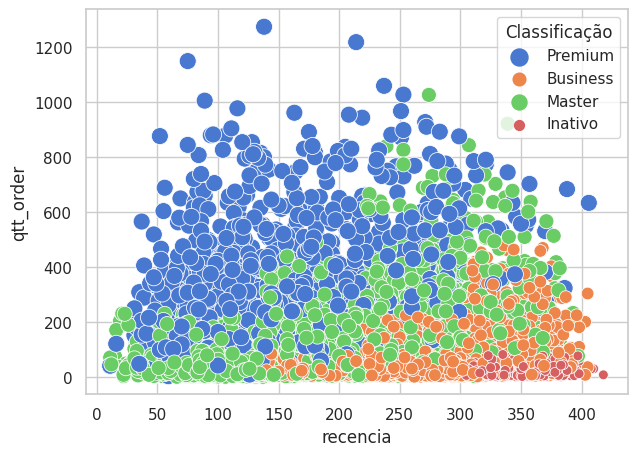

In [ ]:
plot_segmento('recencia','qtt_order', dados)#recência e frequência

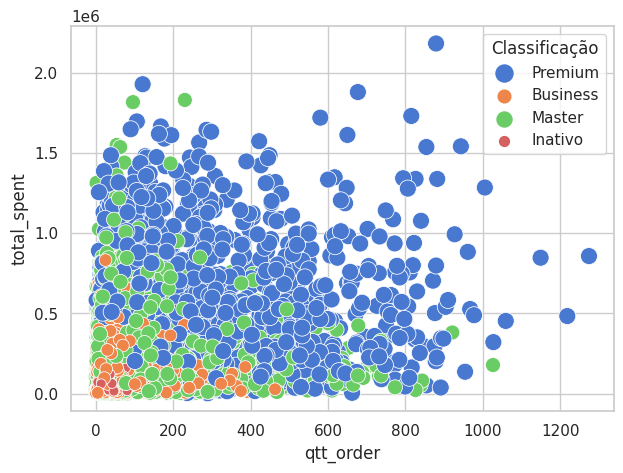

In [ ]:
plot_segmento('qtt_order','total_spent',dados)#frequência e receita

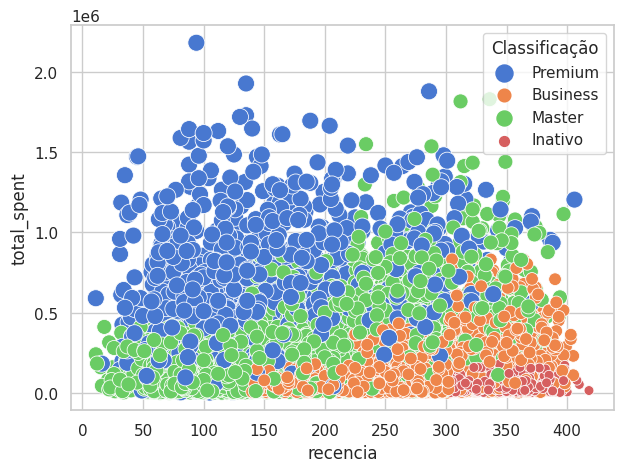

In [ ]:
plot_segmento('recencia','total_spent',dados) #recência e receita

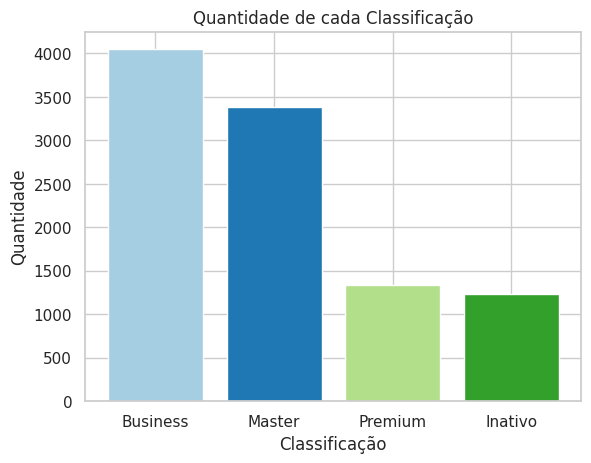

In [ ]:
count_class = dados['Classificação'].value_counts()

plt.bar(count_class.index, count_class.values, color=plt.cm.Paired(range(len(count_class))))
plt.xlabel('Classificação')
plt.ylabel('Quantidade')
plt.title('Quantidade de cada Classificação')
plt.show()